<a href="https://colab.research.google.com/github/Yajiehan/AI-PatternRecognition/blob/main/Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2

# Read the JPG image
ori_image = cv2.imread('image.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


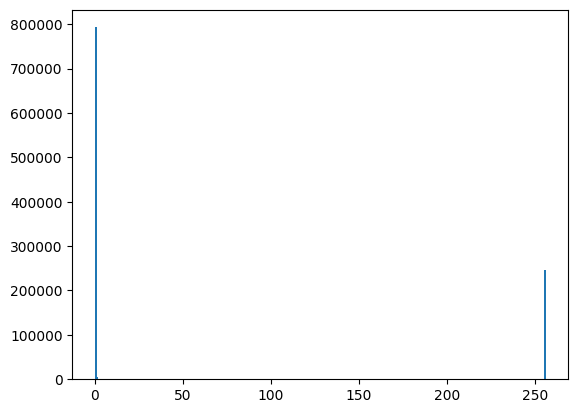

In [22]:
#Plot histogram using matplotlib
import matplotlib.pyplot as plt
plt.hist(blurred_image.ravel(),256,[0,256])
plt.show()



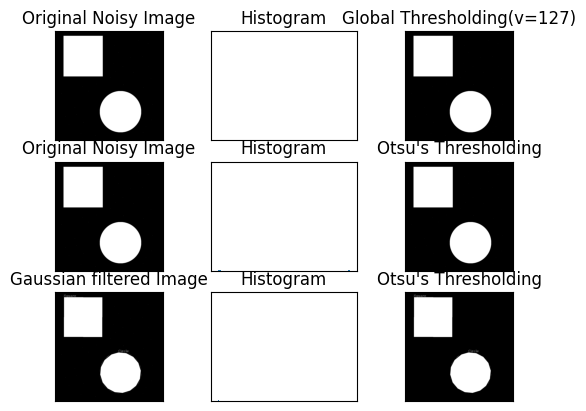

In [23]:
# Global thresholding
th_img1 = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)[1]

# Otsu's thresholding
th_img2 = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# Otsu's thresholding after Gaussian filtering
th_img3 = cv2.threshold(blurred_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]


# plot all the images and their histograms
images = [gray_image, 0, th_img1, gray_image, 0, th_img2, blurred_image, 0, th_img3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding(v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

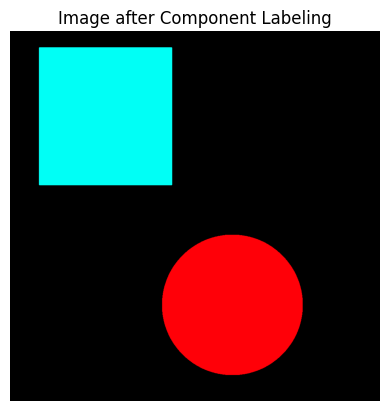

In [6]:
#Connectivity analysis
import numpy as np
def connected_component_label(img):
# Applying cv2.connectedComponents()
    num_labels, labels = cv2.connectedComponents(img)
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    # set bg label to black
    labeled_img[label_hue==0] = 0
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()
connected_component_label(th_img3)

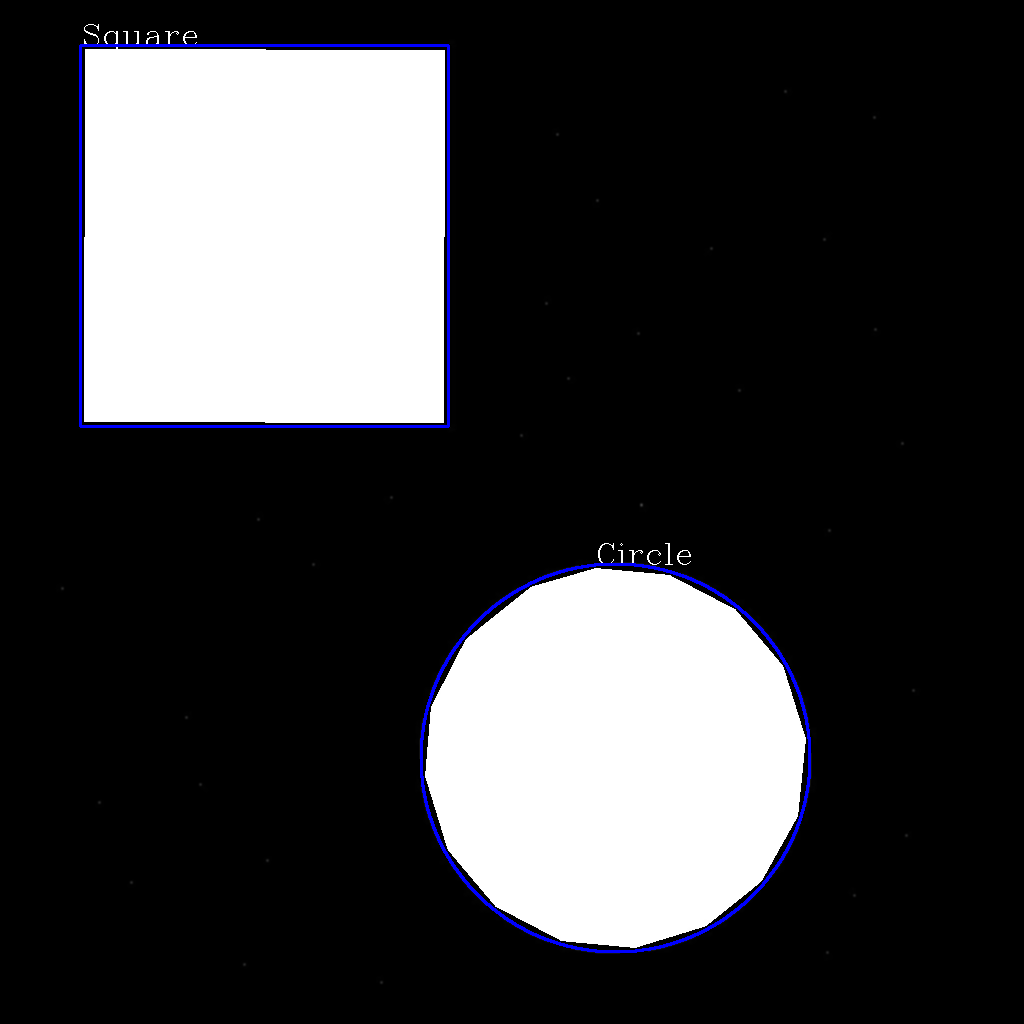

In [21]:
# Pattern Recognition
import cv2
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_COMPLEX
contours = cv2.findContours(th_img3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    cv2.drawContours(blurred_image, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 4:
        cv2.putText(blurred_image, "Square", (x,y), font, 1, (255))
    else:
        cv2.putText(blurred_image, "Circle", (x,y), font, 1, (255))
img = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2BGR)

#Display the results
cv2.drawContours(img, contours, -1, (255,0,0), 2)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
